<a href="https://colab.research.google.com/github/bcguilherme/Bank_Personal_Loan_Modelling/blob/main/Bank_Personal_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Read and Preprocess Data


import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data


df_abt = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx')
df_abt.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Drop rows with missing values

df_abt = df_abt.dropna()


In [ ]:

# Display data types

df_abt.dtypes



ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:

# Display information about the DataFrame

df_abt.info

<bound method DataFrame.info of         ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0        1   25           1      49       4    1.6          1         0   
1        2   45          19      34       3    1.5          1         0   
2        3   39          15      11       1    1.0          1         0   
3        4   35           9     100       1    2.7          2         0   
4        5   35           8      45       4    1.0          2         0   
...    ...  ...         ...     ...     ...    ...        ...       ...   
4995  4996   29           3      40       1    1.9          3         0   
4996  4997   30           4      15       4    0.4          1        85   
4997  4998   63          39      24       2    0.3          3         0   
4998  4999   65          40      49       3    0.5          2         0   
4999  5000   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  Credit

In [ ]:
# Check for missing values


df_abt.isnull()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:

# Select relevant columns

x = df_abt[['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']]

# Target variable

y = df_abt[['Personal_Loan']].copy()

y = pd.DataFrame(y)


In [ ]:
# Display the first few rows of the features and target variable

x.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,49,4,1.6,1,0,1,0,0,0
1,19,34,3,1.5,1,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,1


In [ ]:
# Display the first few rows of the features and target variable

y.head()

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
from pandas.core.reshape.reshape import stack_multiple


In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)


In [ ]:
# Train a Logistic Regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predictions on the test set

lr.predict(X_test)


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Create a DataFrame with actual and predicted values

X_test.assign(churn = y_test).assign(label = lr.predict(X_test))


,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,churn,label
3470,31,175,2,0.5,1,429,0,0,1,1,0,0
75,7,135,4,3.8,2,0,0,1,1,1,1,1
3808,10,152,2,6.5,1,0,0,0,0,0,0,0
1735,36,31,3,0.4,2,0,0,0,1,1,0,0
2628,6,78,4,2.0,2,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2082,7,55,4,2.0,2,0,0,0,1,0,0,0
868,15,161,2,3.3,1,0,1,0,0,1,0,0
2078,11,21,2,1.0,2,0,0,0,0,0,0,0
1360,28,85,4,4.9,1,0,0,0,1,0,0,0


In [ ]:
# Install or upgrade scikit-learn

!pip install --upgrade scikit-learn


In [ ]:
# Plot a Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay


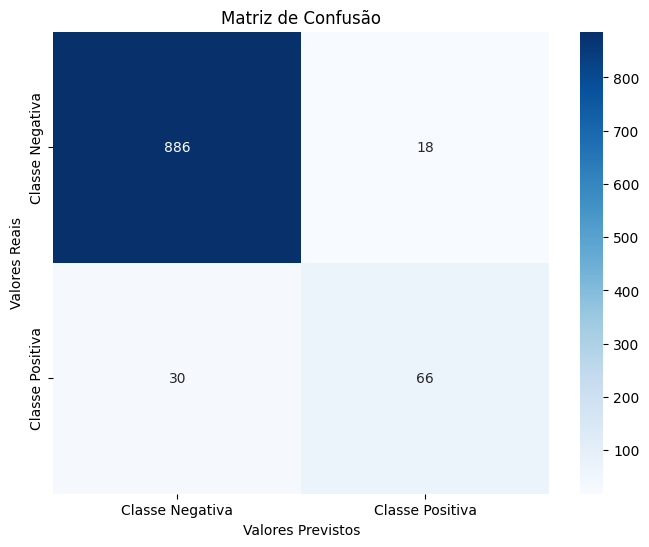

In [ ]:
# Evaluate the model using various metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Classe Negativa', 'Classe Positiva'], yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:

# Evaluate the model using various metrics

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


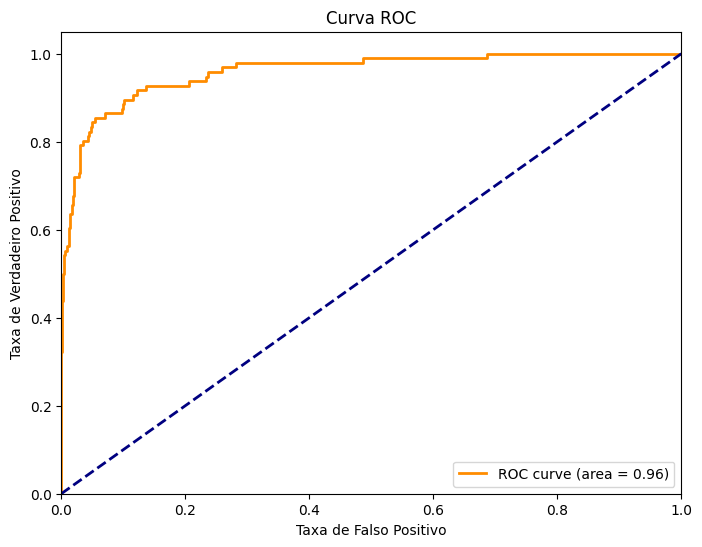

In [ ]:

# ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Additional Metrics on the Training Set


from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score

precision_train = precision_score(y_train, lr.predict(X_train))

accuracy_train = accuracy_score(y_train, lr.predict(X_train))

balanced_accuracy_train = balanced_accuracy_score(y_train, lr.predict(X_train))

print(f"Precisão (Treino): {precision_train}")
print(f"Acurácia (Treino): {accuracy_train}")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_train}")


Precisão (Treino): 0.7869415807560137
Acurácia (Treino): 0.94575
Acurácia Balanceada (Treino): 0.7896040744837758
